# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017_df = pd.read_csv('../data/sat_2017.csv')
act2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<font color='red'>**Answer 3.**</font><br> - SAT dataset contains data on average Verbal, Math, Total scores along with the percentage of students who took the test in each state in 2017. 
<br> - ACT dataset contains data on average English, Math, Reading, Science, and Composite scores along with the percentage of students who took the test in each state in 2017. 

#### 4a. Does the data look complete? 

<font color='red'>**Answer 4a.**</font> Yes, the data looks complete with observations collected from all 51 states.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<font color='red'>**Answer 4b.**  </font><br>There are two significantly low scores in the observations. Maryland SAT average score must be **524** instead of **52**, and Maryland ACT average Composite score must be **23.2** instead of **2.3**. <br> **SAT 2017:** <br>Min Verbal score: **482**, Min Math score: <font color='red'>**52**</font>, Min Total score: **950** <br> Max Verbal score: **644**, Max Math score: **651**, Max Total score: **1295** <br> **ACT 2017:** <br> Min English score: **16.3**, Min Math score: **18.0**, Min Reading score: **18.1**, Min Science score: <font color='red'>**2.3**</font>, Min Composite score: **17.8** <br> Max English score: **25.5**, Max Math score: **25.3**, Max Reading score: **26.0**, Max Science score: **24.9**, Max Composite score: **25.5** 

In [5]:
sat2017_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
act2017_df.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# fix Maryland SAT Math score
# https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
sat2017_df.loc[20, 'Math'] = 524

In [8]:
# fix Maryland ACT Science score
# https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
act2017_df.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
sat2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  


<font color= 'red'>**Answer 5.**</font> <br>Participation and Composite columns should be numeric as opposed to object. <br> - In ACT 2017 dataset, there is a string value "20.2x" in 51st index in Composite column that is causing data type to be object that needs to be corrected. <br> -  We should also convert participation rate into float for statistical use. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
# define a function that converts percentage object to float
def convert_percentage(percentage_cell):
       return float(percentage_cell.strip('%'))/100 

In [12]:
# Reassign SAT participation rate as float type
sat2017_df['Participation'] = sat2017_df['Participation'].map(convert_percentage)

In [13]:
# Reassign ACT participation rate as float type
act2017_df['Participation'] = act2017_df['Participation'].map(convert_percentage)

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
# define a function that converts Composite column into float
def convert_composite(composite_cell):
    if composite_cell.endswith('x'):
        return float(composite_cell.strip('x'))
    else:
        return float(composite_cell)
    
# Reassign Composite column as float type   
act2017_df['Composite'] = act2017_df['Composite'].map(convert_composite)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
# All data types are appropriate now!

- Display the data types again to confirm they are correct.

In [16]:
sat2017_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [17]:
act2017_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
sat2017_df.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [19]:
# rename SAT columns using dictionary
sat2017_new_columns = {
    'State': 'state',
    'Participation': 'sat2017_participation',
    'Evidence-Based Reading and Writing': 'sat2017_verbal',
    'Math': 'sat2017_math',
    'Total': 'sat2017_total',
}
sat2017_df.rename(columns=sat2017_new_columns, inplace=True)

In [20]:
act2017_df.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [21]:
# rename ACT columns using dictionary
act2017_new_columns = {
    'State': 'state',
    'Participation': 'act2017_participation',
    'English': 'act2017_english',
    'Math': 'act2017_math',
    'Reading': 'act2017_reading',
    'Science': 'act2017_science',
    'Composite': 'act2017_composite'
}
act2017_df.rename(columns=act2017_new_columns, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

### 2017 Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|sat2017_df|The states of U.S.A|
|**sat2017_participation**|float64|sat2017_df|Rate of students who took SAT test in 2017|
|**sat2017_verbal**|float64|sat2017_df|Average SAT evidence-based Reading & Writing score in 2017|
|**sat2017_math**|float64|sat2017_df|Average SAT Math score in 2017|
|**sat2017_total**|float64|sat2017_df|Average SAT total score in 2017|
|**state**|object|act2017_df|The states of U.S.A|
|**act2017_participation**|float64|act2017_df|Rate of students who took ACT test in 2017|
|**act2017_english**|float64|act2017_df|Average ACT English score in 2017|
|**act2017_math**|float64|act2017_df|Average ACT Math score in 2017|
|**act2017_reading**|float64|act2017_df|Average ACT Reading score in 2017|
|**act2017_science**|float64|act2017_df|Average ACT Science score in 2017|
|**act2017_composite**|float64|act2017_df|Average ACT composite score in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [22]:
sat2017_df.shape

(51, 5)

In [23]:
act2017_df.shape

(52, 7)

In [24]:
# identify extra state row in ACT dataframe
common_states = act2017_df.merge(sat2017_df, on=['state'])
extra_state = act2017_df[(~act2017_df.state.isin(common_states.state))]
print(extra_state)

# https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe

      state  act2017_participation  act2017_english  act2017_math  \
0  National                    0.6             20.3          20.7   

   act2017_reading  act2017_science  act2017_composite  
0             21.4             21.0               21.0  


In [25]:
# drop extra row from ACT dataframe
act2017_df.drop(act2017_df.index[0], inplace=True)

In [26]:
act2017_df.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
# reset index on ACT dataframe
act2017_df = act2017_df.reset_index(drop=True)

In [28]:
act2017_df.head()

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


In [29]:
# join ACT and SAT dataframes using state column as key
# assign the combined dataframe to new variable
combined_2017 = sat2017_df.join(act2017_df.set_index('state'), on='state')
combined_2017.head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
# export combined dataframe in csv format excluding index
combined_2017.to_csv(r'../data/combined_2017.csv', index = None, header = True)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
sat2018_df = pd.read_csv('../data/sat_2018.csv')
act2018_df = pd.read_csv('../data/act_2018.csv')

In [32]:
# convert SAT participation rate to float
sat2018_df['Participation'] = sat2018_df['Participation'].map(convert_percentage)

In [33]:
# convert ACT participation rate to float
act2018_df['Participation'] = act2018_df['Participation'].map(convert_percentage)

In [34]:
# correct the lowercase state on ACT dataframe to make it same across dataframes
act2018_df.loc[8, 'State'] = 'District of Columbia'

In [35]:
act2018_df.shape

(52, 3)

In [36]:
# find duplicate row in ACT dataframe
act2018_df[act2018_df.duplicated()]

,State,Participation,Composite
20,Maine,0.07,24.0


In [37]:
# remove duplicate row from ACT
act2018_df.drop_duplicates(keep='first', inplace=True) 
act2018_df.shape

(51, 3)

In [38]:
# check if there is still state difference between ACT and SAT dataframes
set(act2018_df['State']).difference(set(sat2018_df['State']))
# nope, all good.

set()

In [39]:
sat2018_df.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [40]:
# rename SAT columns using dictionary
sat2018_new_columns = {
    'State': 'state',
    'Participation': 'sat2018_participation',
    'Evidence-Based Reading and Writing': 'sat2018_verbal',
    'Math': 'sat2018_math',
    'Total': 'sat2018_total',
}
sat2018_df.rename(columns=sat2018_new_columns, inplace=True)

In [41]:
act2018_df.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [42]:
#rename ACT columns using dictionary
act2018_new_columns = {
    'State': 'state',
    'Participation': 'act2018_participation',
    'Composite': 'act2018_composite'
}
act2018_df.rename(columns=act2018_new_columns, inplace=True)

In [43]:
# reset index on ACT dataframe
act2018_df = act2018_df.reset_index(drop=True)

### 2018 Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|sat2018_df|The states of U.S.A|
|**sat2018_participation**|float64|sat2018_df|Rate of students who took SAT test in 2018|
|**sat2018_verbal**|float64|sat2018_df|Average SAT evidence-based Reading & Writing score in 2018|
|**sat2018_math**|float64|sat2018_df|Average SAT Math score in 2018|
|**sat2018_total**|float64|sat2018_df|Average SAT total score in 2018|
|**state**|object|act2018_df|The states of U.S.A|
|**act2018_participation**|float64|act2018_df|Rate of students who took ACT test in 2018|
|**act2018_composite**|float64|act2018_df|Average ACT composite score in 2018|

In [44]:
# join ACT and SAT dataframes using state column as key
# assign the combined dataframe to new variable
combined_2018 = sat2018_df.join(act2018_df.set_index('state'), on='state')
combined_2018.head()

,state,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [45]:
# export combined dataframe in csv format excluding index
combined_2018.to_csv(r'../data/combined_2018.csv', index = None, header = True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
# join combined 2017 and 2018 dataframes using state column as key 
# assign the final dataframe to new variable
satact1718 = combined_2017.join(combined_2018.set_index('state'), on='state')
satact1718.head(10)

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9


In [47]:
# export combined dataframe in csv format excluding index
satact1718.to_csv(r'../data/final.csv', index = None, header = True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [48]:
satact1718.describe().T

,count,mean,std,min,25%,50%,75%,max
sat2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat2017_verbal,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [49]:
# define standart deviation function

def standard_deviation(data):
    n = len(data)
    mu = float(sum(data) / n)
    variance = sum([(x - mu)**2 for x in data]) / n
    
    return np.sqrt(variance)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
satact1718_dict = satact1718.to_dict('list')

In [51]:
# remove non-numeric state column
satact1718_dict.pop('state')

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [52]:
sd = {key: round(standard_deviation(value),6) for key, value in satact1718_dict.items()}

In [53]:
sd

{'sat2017_participation': 0.349291,
 'sat2017_verbal': 45.21697,
 'sat2017_math': 46.657134,
 'sat2017_total': 91.583511,
 'act2017_participation': 0.318242,
 'act2017_english': 2.330488,
 'act2017_math': 1.962462,
 'act2017_reading': 2.046903,
 'act2017_science': 1.722216,
 'act2017_composite': 2.000786,
 'sat2018_participation': 0.369466,
 'sat2018_verbal': 47.03461,
 'sat2018_math': 47.301946,
 'sat2018_total': 93.227424,
 'act2018_participation': 0.337017,
 'act2018_composite': 2.090779}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes, they match up except slight difference in decimals.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [54]:
satact1718.sort_values('sat2017_participation').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4


In [55]:
satact1718.sort_values('sat2018_participation').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2,0.03,633,625,1257,1.00,20.0
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8,0.03,622,618,1240,0.77,21.9
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5


In [56]:
satact1718.sort_values('sat2017_participation', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1


In [57]:
satact1718.sort_values('sat2018_participation', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.0,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.0,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.0,511,499,1011,0.22,24.2
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.0,508,493,1001,0.36,22.3


In [58]:
satact1718.sort_values('act2017_participation').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


In [59]:
satact1718.sort_values('act2017_participation', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.0,20.5
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.0,20.4
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8,0.06,624,607,1231,1.0,19.6


In [60]:
satact1718.sort_values('act2018_participation').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


In [61]:
satact1718.sort_values('act2018_participation', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.0,20.5
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.0,20.4
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8,0.06,624,607,1231,1.0,19.6


In [62]:
satact1718[(satact1718['sat2017_participation'] > .5) & (satact1718['act2017_participation'] > .5) ]

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9


In [63]:
satact1718[(satact1718['sat2018_participation'] > .5) & (satact1718['act2018_participation'] > .5) ]

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3


### Participation Rate % Comparison

<font color= 'red'>**2017 SAT:**</font><br> North Dakota, Mississippi, Iowa and other mid-west states (a.k.a Heartland) have the lowest participation rate (2%). <br> District of Columbia, Michigan, Connecticut, Delaware, New Hampshire and some other east-coast states have the highest participation rate (100%). <br> <font color= 'red'>**2018 SAT:**</font> <br>North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin and other mid-west states have the lowest participation rate (2-3%).<br>Colorado, Connecticut, Delaware, Michigan, Idaho and some other east-coast states have the highest participation rate (100%). The participation rate of Colorado have significantly changed year-to-year from 11% to 100% when the test became mandatory for getting into college. <br> https://www.testive.com/colorado-sat-change-2017/<br><font color= 'red'>**2017 ACT:**</font><br> Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania and other north-east states have the lowest participation rate (18%). <br> Alabama, Kentucky, Utah, Wisconsin, Tennessee have the highest participation rate (100%). <br> <font color= 'red'>**2018 ACT:**</font><br>Maine, Rhode Island, New Hampshire, Delaware,  Pennsylvania have the lowest participation rate (15%).<br>Alabama, Kentucky, Wisconsin, Tennessee, Utah have the highest participation rate (100%). These states are consistent year-to-year. <br>
There is a positive correlation in participation rates between years with Colorado exception. However, there is a negative correlation in participation rates of SAT and ACT tests. Demographically, east coast is SAT-dominant while mid-west is ACT-dominant.There are also neutral states that show above 50% participation on both tests like Hawaii, Florida, South Carolina, Georgia in both years.

In [64]:
satact1718.sort_values('sat2017_total').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0


In [65]:
satact1718.sort_values('sat2017_total', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,21.7,0.04,633,631,1265,0.71,21.6


In [66]:
satact1718.sort_values('sat2018_total').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4,0.28,513,486,999,0.65,20.3
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4


In [67]:
satact1718.sort_values('sat2018_total', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,21.7,0.04,633,631,1265,0.71,21.6


In [68]:
satact1718.sort_values('act2017_composite').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
33,North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1


In [69]:
satact1718.sort_values('act2017_composite', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4,0.80,562,563,1125,0.25,25.5
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6


In [70]:
satact1718.sort_values('act2018_composite').head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1


In [71]:
satact1718.sort_values('act2018_composite', ascending=False).head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_verbal,sat2018_math,sat2018_total,act2018_participation,act2018_composite
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4,0.80,562,563,1125,0.25,25.5
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
32,New York,0.67,528,523,1052,0.31,23.8,24.0,24.6,23.9,24.2,0.79,534,534,1068,0.27,24.5
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2


### Average Total Score Comparison

<font color= 'red'>**2017 SAT:**</font><br> District of Columbia, Delaware, Idaho, Michigan, Maine have the lowest total score (950-1000). <br> Minnesota, Wisconsin, Iowa, Missouri, Kansas have the highest total score (1260+). <br> <font color= 'red'>**2018 SAT:**</font> <br>District of Columbia, Delaware, West Virginia, Idaho, Utah have the lowest total score (1000).<br>Minnesota, Wisconsin, North Dakota, Iowa, Kansas have the highest total score (1265+).<br><font color= 'red'>**2017 ACT:**</font><br> Nevada, Mississippi, South Carolina, Hawaii, North Carolina have the lowest composite score (18-19). <br> New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia have the highest composite score (24+). <br> <font color= 'red'>**2018 ACT:**</font><br>Nevada, South Carolina, Mississippi, Hawaii, Alabama have the lowest composite score (18-19).<br>Connecticut, Massachusetts, New Hampshire, New York, Michigan have the highest composite score.(24+). <br>
There is a suprising result that mid-west states are consistently most successful in SAT test both years despite their low participation rate. "In the Midwest, the SAT is often a back-up exam for perfectionists—the students who want to exhaust every possible option before turning in their college applications." **(Ben Taylor, Forbes, June 2014)**

### Interesting States

1) Colorado: <br> Participation rate jumped from 11% to 100% year-to year. Because the test became required for college education. <br> 2) Mid-west states: <br> SAT scores are highest despite low participation rate.Iit looks like the choice is mostly ACT and only best students take SAT as an alternative.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

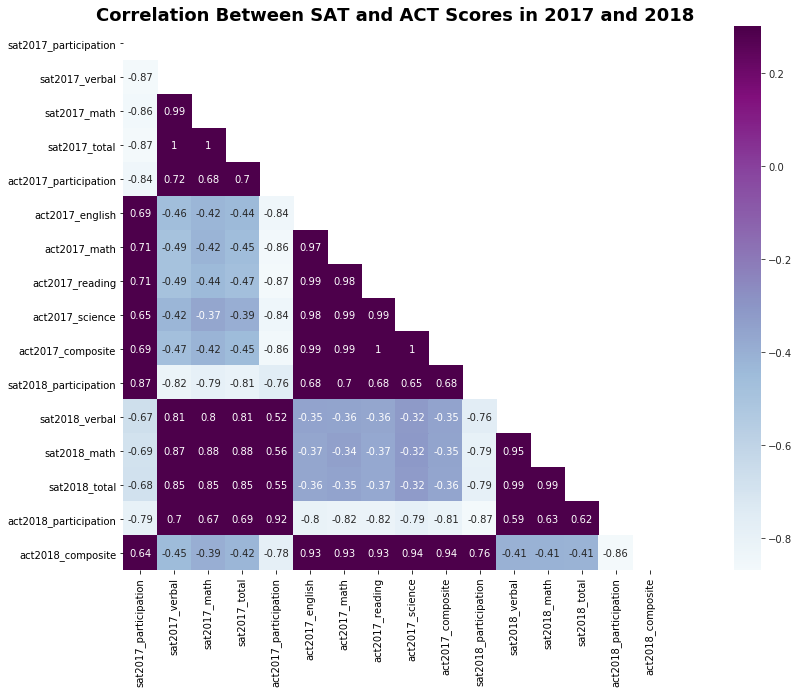

In [72]:
plt.figure(figsize=(24,10))

mask = np.zeros_like(satact1718.corr())
mask[np.triu_indices_from(mask)] = True

ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(satact1718.corr(), mask=mask, vmax=.3, square=True, annot=True, cmap="BuPu", robust=True, ax=ax, center=-0.3)

    ax.set_title('Correlation Between SAT and ACT Scores in 2017 and 2018', fontsize=18, weight='bold')


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) # Specify figure size
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color=list_of_colors[i]) # Set colors

    for i, title in enumerate(list_of_titles): # Set titles
        ax[i].set_title(title, weight='bold')
    for i, xlabel in enumerate(list_of_xlabels): # Set xlabels
        ax[i].set_xlabel(xlabel, weight='bold')

    if len(list_of_columns) % 2 == 0:
        pass
    else:
        fig.delaxes(ax[len(list_of_columns)])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

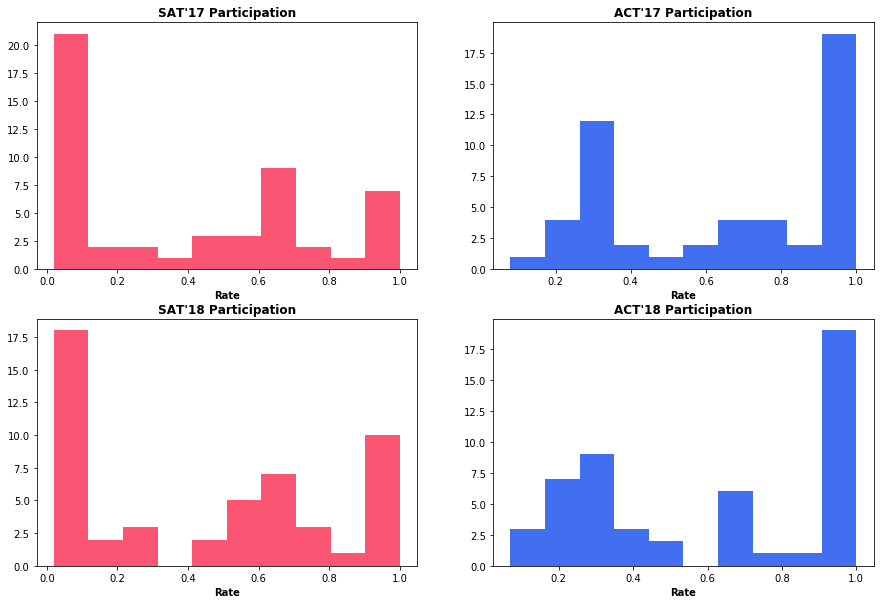

In [74]:
subplot_histograms(satact1718,
                   ['sat2017_participation', 'act2017_participation', 'sat2018_participation', 'act2018_participation'], 
                   ['SAT\'17 Participation', 'ACT\'17 Participation', 'SAT\'18 Participation', 'ACT\'18 Participation'],
                   ['Rate', 'Rate', 'Rate', 'Rate'],
                   ['#fa5673', '#426ef0', '#fa5673', '#426ef0'])

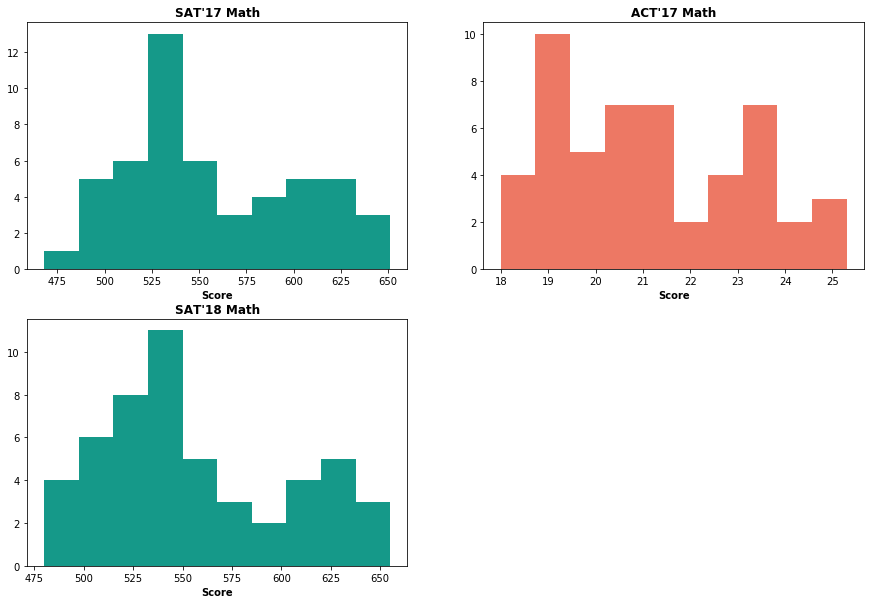

In [75]:
subplot_histograms(satact1718,
                   ['sat2017_math', 'act2017_math', 'sat2018_math'], 
                   ['SAT\'17 Math', 'ACT\'17 Math', 'SAT\'18 Math'],
                   ['Score', 'Score', 'Score'],
                   ['#159989', '#ed7864', '#159989'])

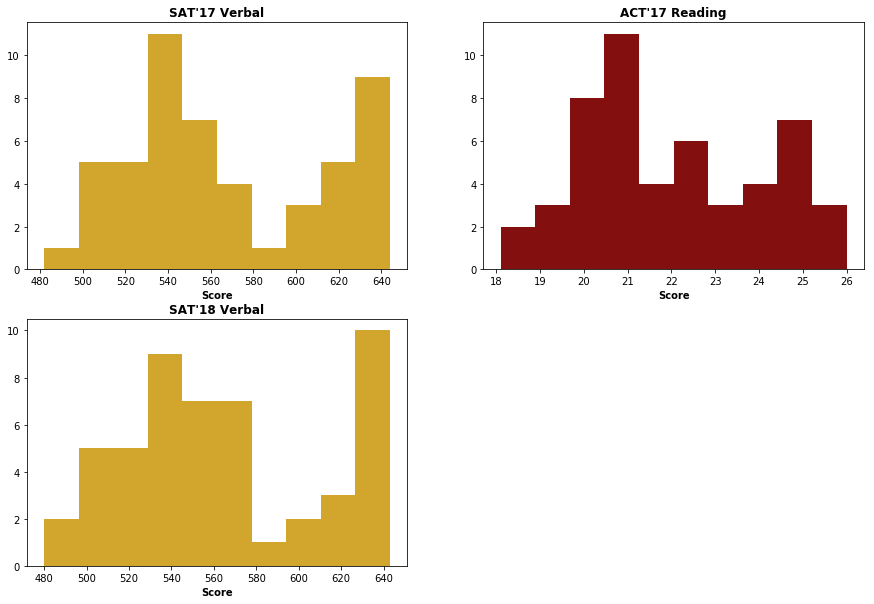

In [76]:
subplot_histograms(satact1718,
                   ['sat2017_verbal', 'act2017_reading', 'sat2018_verbal'], 
                   ['SAT\'17 Verbal', 'ACT\'17 Reading', 'SAT\'18 Verbal'],
                   ['Score', 'Score', 'Score'],
                   ['#d2a62c', '#830f0f', '#d2a62c'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [77]:
# define a function that creates custom scatter plot
def subplot_scatter(dataframe, x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, c=color)  
    plt.title(title, weight='bold', fontsize=18, color='red')
    plt.xlabel(xlabel, weight='bold', fontsize=12)
    plt.ylabel(ylabel, weight='bold', fontsize=12)

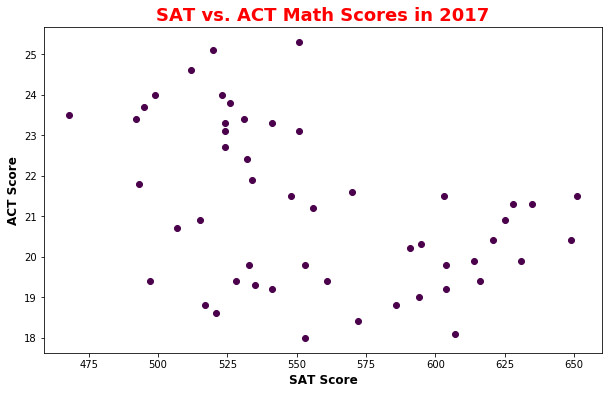

In [78]:
# plot to correlate SAT vs. ACT Math scores for 2017
subplot_scatter(satact1718, satact1718['sat2017_math'], 
                satact1718['act2017_math'], 
                'SAT vs. ACT Math Scores in 2017',
                'SAT Score', 'ACT Score', '#4b004b')

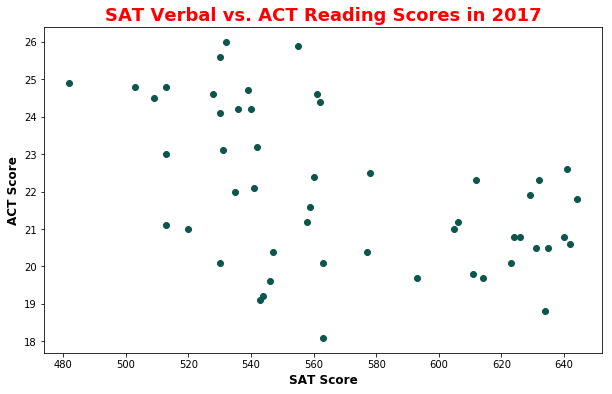

In [79]:
# plot to correlate SAT Verbal vs. ACT Reading scores for 2017
subplot_scatter(satact1718, satact1718['sat2017_verbal'], 
                satact1718['act2017_reading'], 
                'SAT Verbal vs. ACT Reading Scores in 2017', 
                'SAT Score', 'ACT Score', '#0c564d')

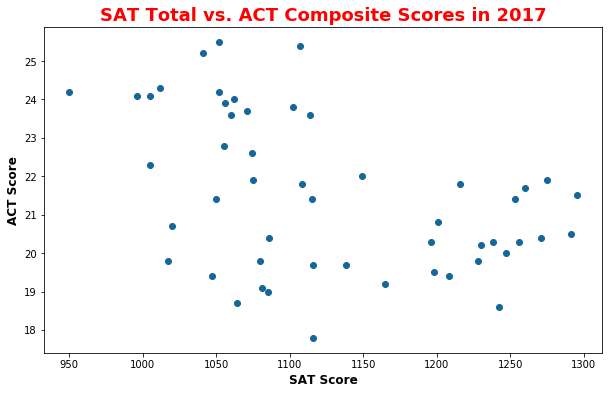

In [80]:
# plot to correlate SAT Total vs. ACT Composite scores for 2017
subplot_scatter(satact1718, satact1718['sat2017_total'], 
                satact1718['act2017_composite'], 
                'SAT Total vs. ACT Composite Scores in 2017', 
                'SAT Score', 'ACT Score', '#156799')

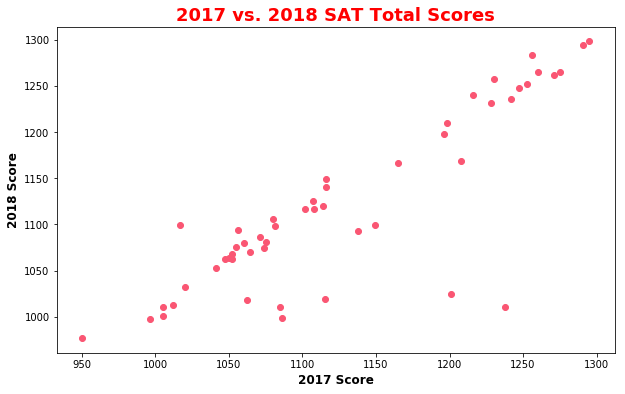

In [81]:
# plot to correlate SAT 2017 vs. 2018 Total scores
subplot_scatter(satact1718, satact1718['sat2017_total'], 
                satact1718['sat2018_total'], 
                '2017 vs. 2018 SAT Total Scores', 
                '2017 Score', '2018 Score', '#FA5673')

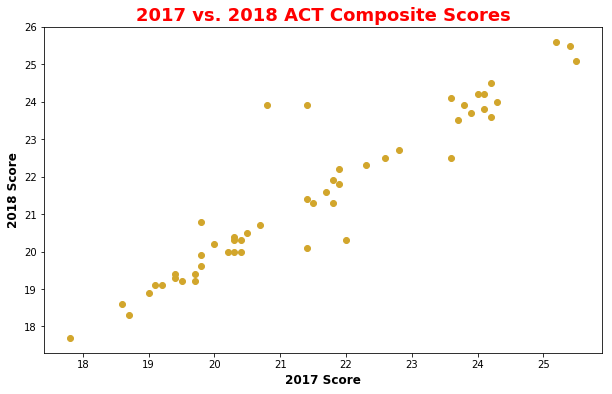

In [82]:
# plot to correlate ACT 2017 vs. 2018 Composite scores
subplot_scatter(satact1718, satact1718['act2017_composite'], 
                satact1718['act2018_composite'], 
                '2017 vs. 2018 ACT Composite Scores', 
                '2017 Score', '2018 Score', '#d2a62c')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

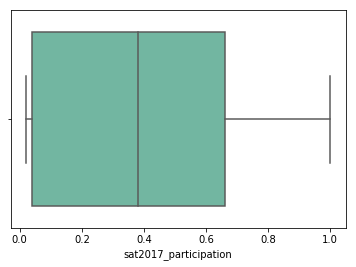

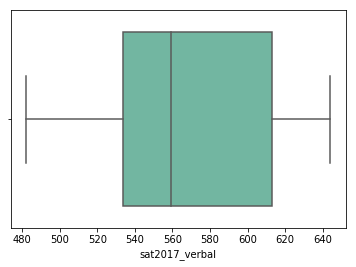

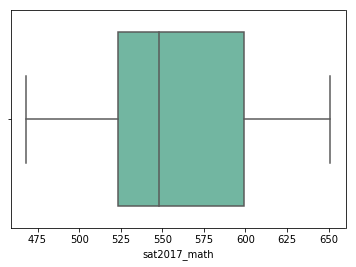

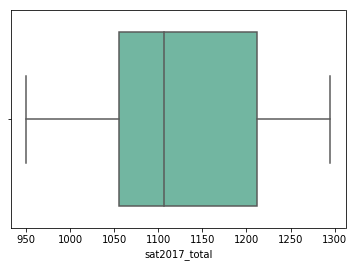

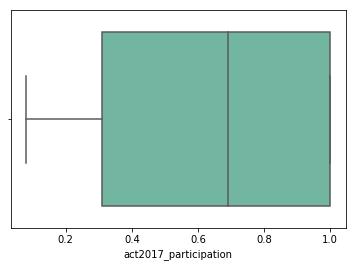

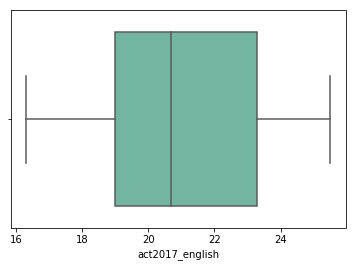

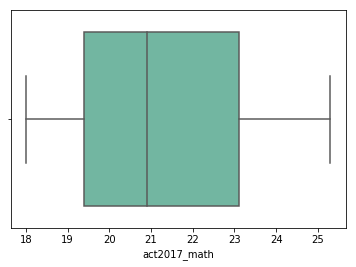

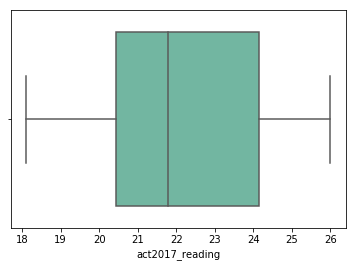

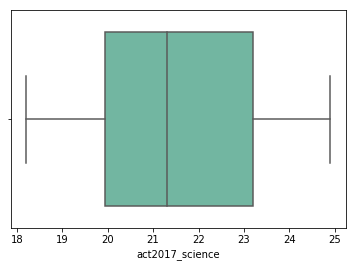

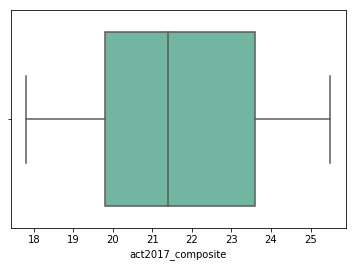

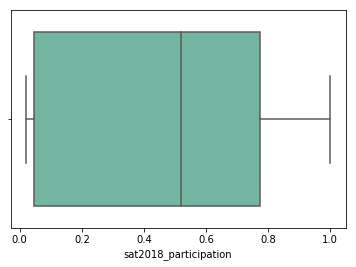

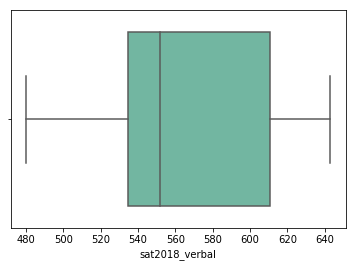

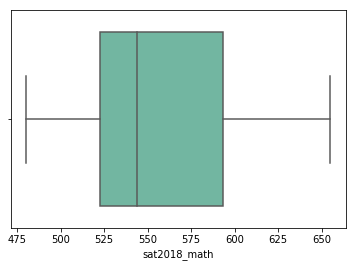

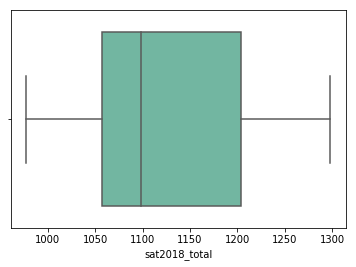

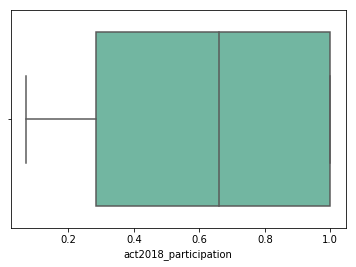

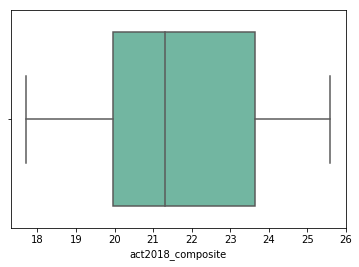

In [83]:
# create boxplots for every numeric column to demonstrate central tendency

for i, column in enumerate(list(satact1718.select_dtypes(np.number).columns)):
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=satact1718[column], orient="h", palette="Set2")        

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [84]:
combined_2017.head()

,state,sat2017_participation,sat2017_verbal,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


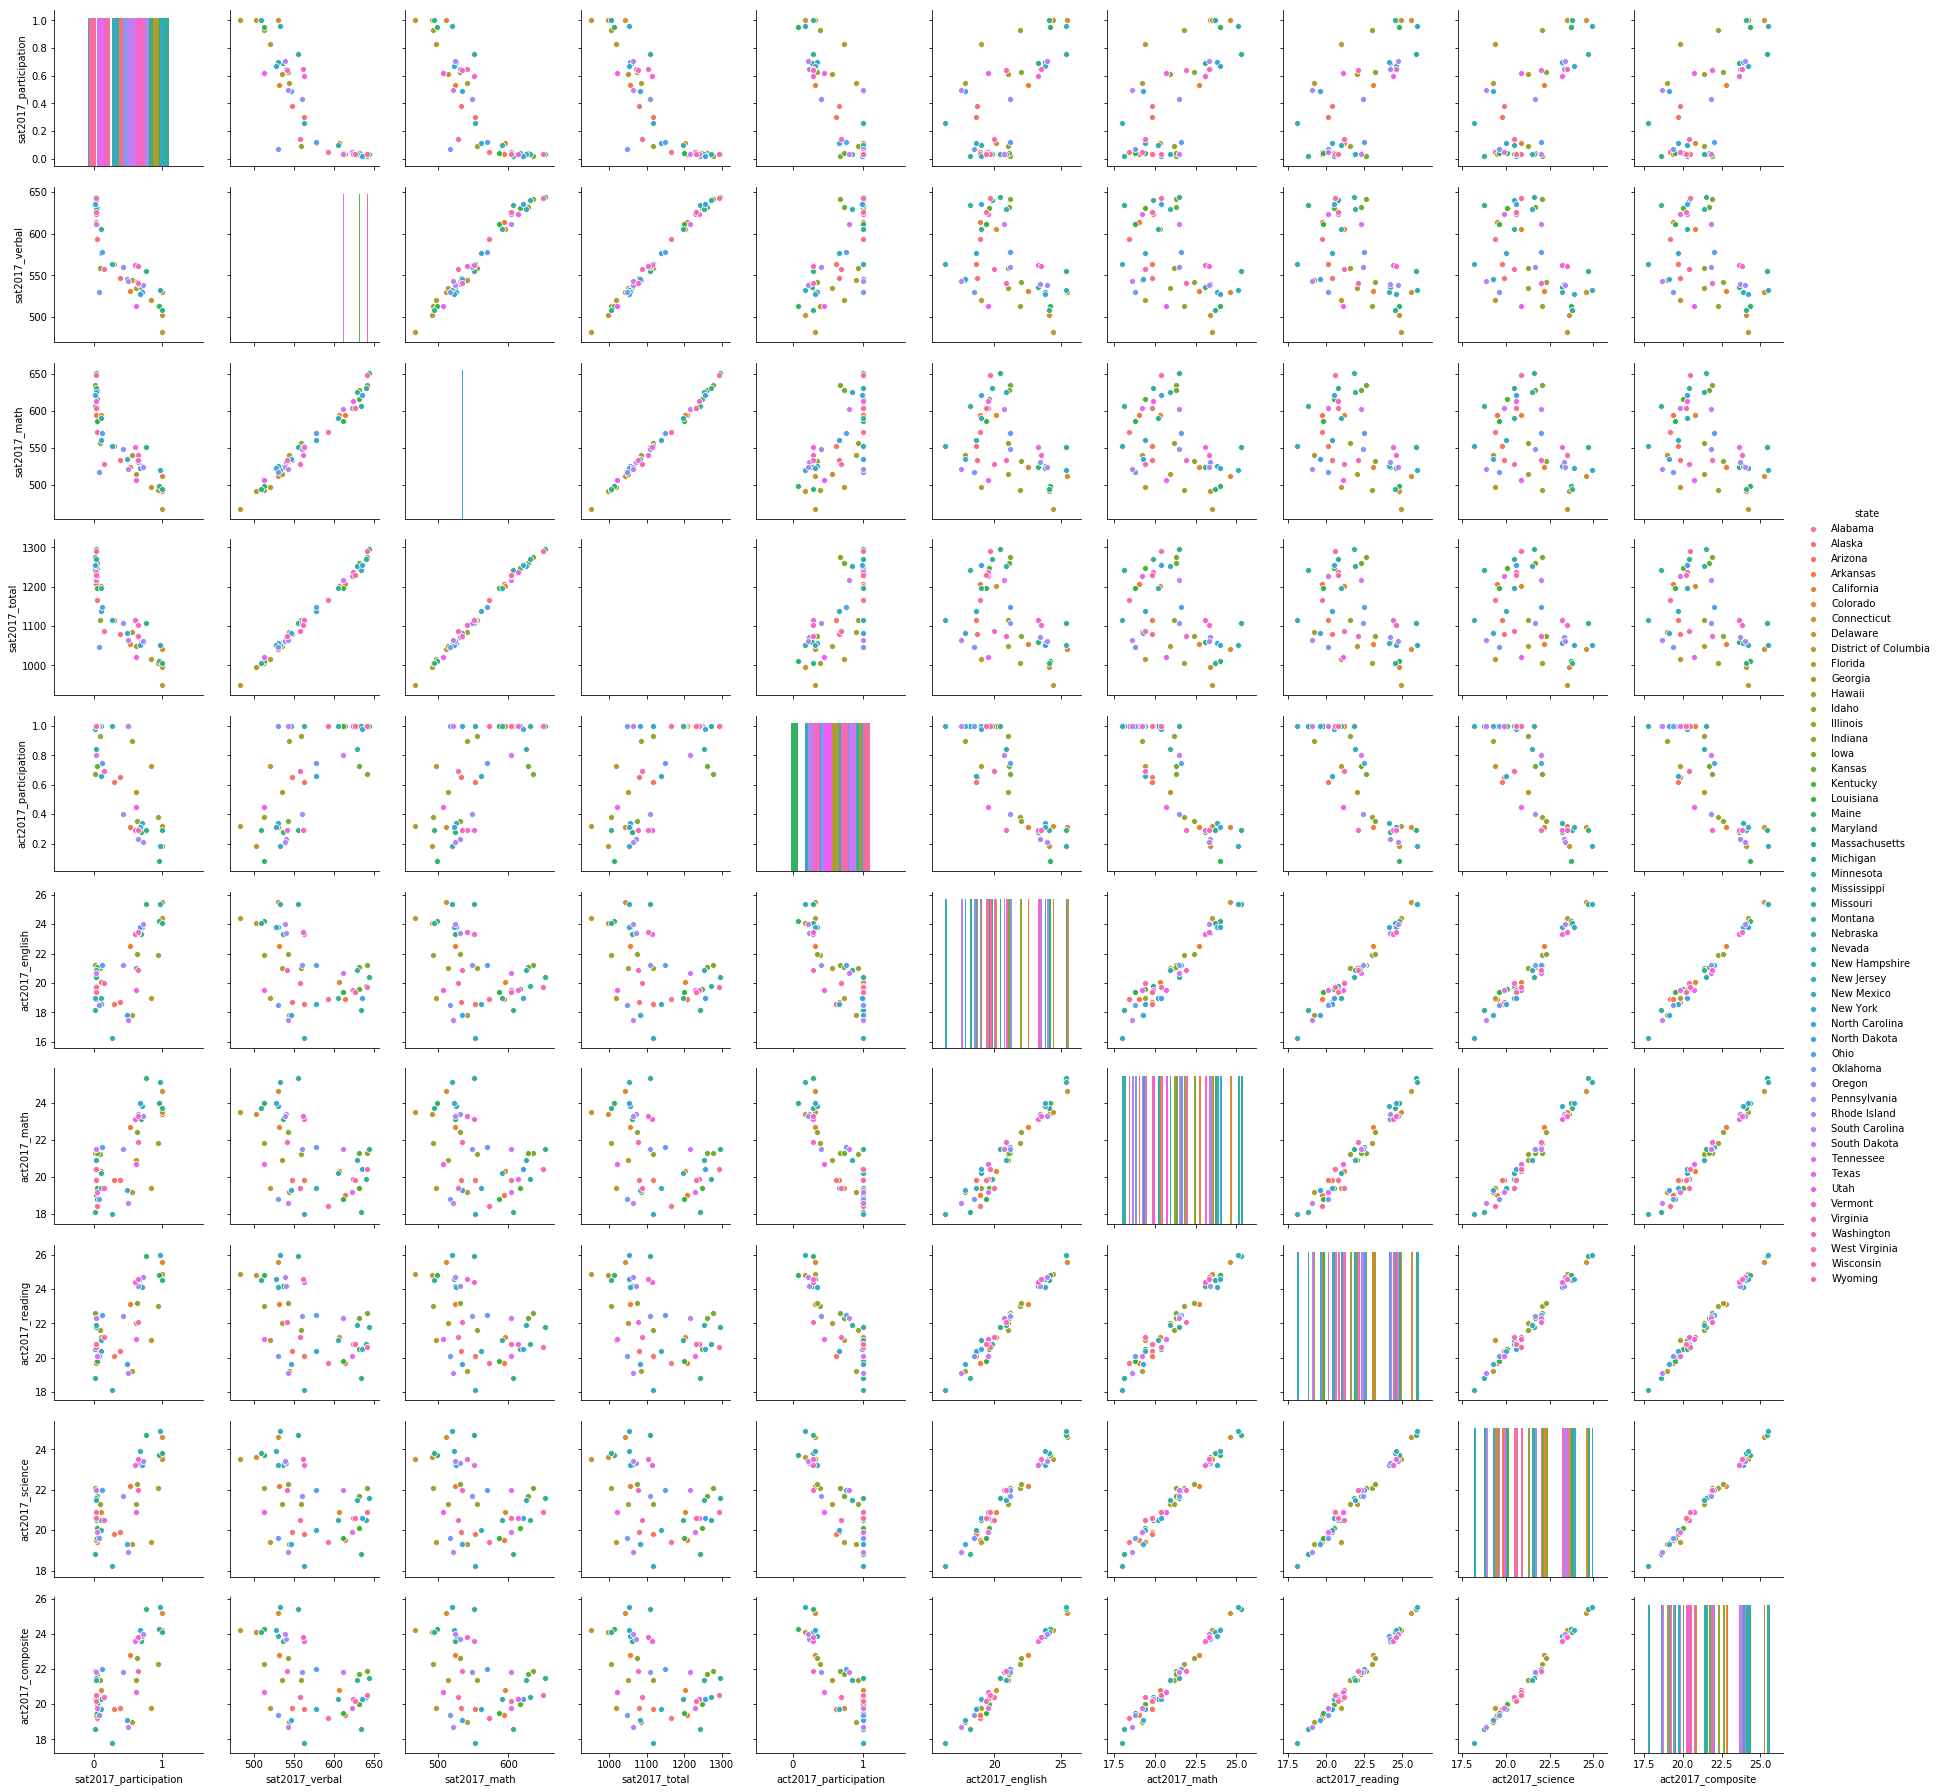

In [85]:
# create a pair plot to see correllation of each pair of variable for 2017
sns.pairplot(combined_2017, hue='state', diag_kind='hist', palette="husl")

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?